# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
# Q1 (code)
import tomotopy as tp # used for topic modeling
import little_mallet_wrapper # used for processing, cleaning the texts
import seaborn as sns # used for visualization (creating heatmaps)
import pandas as pd # used for data wrangling
import re # used for regular expressions
from random import sample # used for creating a random sample
import matplotlib.pyplot as plt # used for visualization (creating plots)
from IPython.display import Markdown, display # used for displaying the top documents of a topic in a markdown format

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [2]:
# Q2 (code)
df_trump = pd.read_csv('trump_tweets.csv', encoding="UTF-8")
df_sanders = pd.read_csv('sanders_tweets.csv', encoding="UTF-8")
df = pd.concat([df_trump, df_sanders])
df # to see whether the concatanation was successful and also to see the name of the columns

Username             TweetId  \
0     @realDonaldTrump  822421390125043713   
1     @realDonaldTrump  822501803615014918   
2     @realDonaldTrump  822501939267141634   
3     @realDonaldTrump  822502135233384448   
4     @realDonaldTrump  822502270503972872   
...                ...                 ...   
7291        SenSanders  683043336555524096   
7292        SenSanders  683006039877353472   
7293        SenSanders  682792864535998464   
7294        SenSanders  682758913071181824   
7295        SenSanders  682734558031253504   

                                    Title  \
0     @realDonaldTrump_822421390125043713   
1     @realDonaldTrump_822501803615014918   
2     @realDonaldTrump_822501939267141634   
3     @realDonaldTrump_822502135233384448   
4     @realDonaldTrump_822502270503972872   
...                                   ...   
7291        SenSanders_683043336555524096   
7292        SenSanders_683006039877353472   
7293        SenSanders_682792864535998464   
7294        SenSanders_682758913071181824   
7295        SenSanders_682734558031253504   

                                                Content  
0      It all begins today! I will see you at 11:00 ...  
1      Today we are not merely transferring power fr...  
2      power from Washington, D.C. and giving it bac...  
3      What truly matters is not which party control...  
4      January 20th 2017, will be remembered as the ...  
...                                                 ...  
7291  It's not a radical concept that maybe the Unit...  
7292  People should not have to go without the medic...  
7293                                    Happy New Year!  
7294  Today in America over 20% of our children are ...  
7295  The billionaire class cannot have it all. Our ...  

[30371 rows x 4 columns]

### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [3]:
# Q3 (code)
# Tip: add the following line to remove URLS and user mentions
# processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)

training_data = []

for text in df['Content']:
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)
    training_data.append(processed_text)

original_texts = [text for text in df['Content']]
titles = [title for title in df['Title']]

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [4]:
# Q4 (code)
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 20

# Initialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.68448206049943
Iteration: 10	Log-likelihood: -9.318889487086285
Iteration: 20	Log-likelihood: -9.156508490527226
Iteration: 30	Log-likelihood: -9.053243429463963
Iteration: 40	Log-likelihood: -8.991907224489934
Iteration: 50	Log-likelihood: -8.951207814482677
Iteration: 60	Log-likelihood: -8.91701485641094
Iteration: 70	Log-likelihood: -8.891082219156473
Iteration: 80	Log-likelihood: -8.870065990817205
Iteration: 90	Log-likelihood: -8.85739269680977


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [5]:
# Q5a (code)
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

great states united china north big state new good forward korea president see well trade soon many carolina working meeting

✨Topic 1✨

tax trump security social cuts cut republicans live prime medicare whitehouse bill president plan minister breaks want sanders news would

✨Topic 2✨

great news fake ever history best party new big president one thank economy republican time record trump country going people

✨Topic 3✨

trump coronavirus covid federal government response new help lives vaccine administration act must spread service masks use critical anti marijuana

✨Topic 4✨

trump fbi russia collusion witch hunt mueller obama campaign hillary report clinton comey investigation democrats president crooked election never russian

✨Topic 5✨

news fake people would media many even never years much like made bad good want china said nothing got get

✨Topic 6✨

biden trump joe election president left democrats radical fraud sleepy ballots democrat via wa

**Q5b** (words)<br>
**Describe what each topic is about. What ideas, values, or situations do these keywords refer to?**<br>

Topic0:<br>Based on the keywords *states*, *united*, *china*, *korea*, and *trade*, this topic could be about the trading partners of the USA, especially, about its trading relations with China and Korea. The words *north* and *carolina* may refer to the furniture industry in North Carolina, and - together with the previous information - to the tariffs battle with China. (characteristic of Trump)<br>

Topic1:<br>The keywords *security*, *social*, *medicare* and *plan* suggest that the topic is about healthcare, health insurance plans and social security programs. The words *tax*, *cut* and *cuts* may refer to reducing the costs and taxes. (characteristic of Sanders)<br>

Topic2:<br>The keywords *news* and *fake* can refer to fake news. The words *president*, *republican*, *trump*, *country* refer to Donald Trump, a Republican president of the US. The words *ever*, *history*, *best*, *new*, *record* may suggest a historical event. (characteristic of Trump)<br>

Topic3:<br>The keywords *trump*, *coronavirus*, *covid*, *government*, *response*, *lives*, *vaccines* and *masks* suggest that the topic is about the US government's response to coronavirus in the form of masks and vaccines under Trump's presidency. (characteristic of Trump)<br>

Topic4:<br>The keywords *trump*, *fbi*, *russia*, *russian*, *witch*, *hunt*, *president*, *election*, *obama*, *hillary*, *clinton* all point to the FBI's investigation on the Russian interference in the 2016 US elections. In the 2016 US elections Donald Trump and Hillary Clinton were running for presidency as Barack Obama's second term was expiring. (characteristic of Trump)<br>

Topic5:<br>The keywords *news*, *fake* and *media* refer to fake news & the media. (characteristic of Trump)<br>

Topic6:<br>The keywords refer to the 2020 US elections, in which Joe Biden (nominee of the Democratic Party) ('Sleepy Joe' for those who oppose his presidency) and Donald Trump (nominee of the Republican Party) were running for presidency. More specifically, the keywords point to the situation in which Donald Trump and his allies accused the winner of the 2020 US elections, Joe Biden, of voter fraud, and therefore, of a stolen election. (characteristic of Trump)<br>

Topic7:<br>The keywords *jobs*, *workers*, *tax*, *taxes*, *wage*, *working*, *economy*, *unemployment*, *middle*, *class* suggest that the topic is about the issues and the interrelatedness of unemployment, the need for jobs, minimum wage, the workers, the middle class, and the economy in the USA. (characteristic of Sanders)<br>

Topic8:<br>The keywords suggest that the topic is about some of the American values (keywords: *america*, *country*), such as God (keyword: *god*) and family (keywords: *women*, *men*, *happy*, *family*, *love*, *life*). The topic may connect the concept of the family to the people (keyword: *people*) as well as to the whitehouse (keywords: *whitehouse*, *flotus* - the First Lady of the US). The words *day*, *today*, *honor* and *thank* might also refer to a special day. (can be characteristic of both Trump and Sanders) <br>

Topic9:<br>According to the keywords *health*, *care*, *system* and *need*, the topic could be about the dire need of proper healthcare in the US. The words *make*, *million*, *millions* and *drug*, might refer to the pharmaceutical industry and how much money it makes. (characteristic of Sanders)<br>

Topic10: <br> The keywords *president*, *impeachment*, *house*, *trump*, *whistleblower*, *ukraine*, *call* and *pelosi* refer to the situation in which Nancy Pelosi announced that "the House would initiate a formal impeachment inquiry against President Trump, charging him with betraying his oath of office and the nation’s security by seeking to enlist a foreign power to tarnish a rival for his own political gain (https://www.nytimes.com/2019/09/24/us/politics/democrats-impeachment-trump.html). " "The whistleblower's complaint claimed that the White House tried to 'lock down' all records of the call between President Donald Trump and his Ukrainian counterpart because officials there understood the gravity and potential consequences of what had transpired during the conversation (https://www.nbcnews.com/politics/congress/pelosi-handling-whistleblower-complaint-cover-n1059106). " The keywords *schiff*, *jim*, *jordan* and *adam* refer to Adam Schiff (Democrat) and Jim Jordan (Republican), who were also related to the process of impeachment. In sum, this topic is about the Trump-Ukraine scandal. (characteristic of Trump)<br>

Topic11:<br> The keywords *law*, *order*, *police* and *enforcement* suggest that this topic is about the police, law enforcement, and law and order. The words *thank*, *support* and *honor* may suggest the appreciation of the work of the police. (can be characteristic of both Trump and Sanders)<br>

Topic12:<br> The keywords *border*, *wall*, *immigration*, *mexico*, *illegal* refer to the (building of a) wall on the border between the US and Mexico to prevent the illegal immigration from Mexico into the US. The words *senate*, *court*, *supreme*, *bill* can be associated with the US Supreme Court's decision about the Senate Bill on the immigration law. (characteristic of Trump)<br>

Topic13:<br>The keywords *great*, *military*, *maga*, *job*, *vets* and *america* may refer to Trump's MAGA - Make America Great Again movement. The words *thank*, *endorsement*, *governor* and *congratulations* can suggest the endorsement of a governor. (characteristic of Trump)<br>

Topic14:<br> On the basis of the keywords *change*, *united*, *climate*, *states*, *energy*, *iran*, *american*, *fossil* and *fight*, the topic could be about the issues of climate change, energy and fossil fuels, and how these issues are influenced by the relationship and foreign policy between the US and Iran (https://theconversation.com/us-iran-normalisation-could-fight-climate-change-9064). (characteristic of Sanders)<br>

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [6]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5880497287213803 
Per Topic: [0.4900755524635315, 0.6238611891865731, 0.5041892915964127, 0.5367226839065552, 0.76919806599617, 0.5683032989501953, 0.5878010138869285, 0.6248141586780548, 0.6371434479951859, 0.6253224223852157, 0.5750991374254226, 0.5046486973762512, 0.5312128067016602, 0.7013831019401551, 0.5409710623323918]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

**Q6** (words)<br>
Initially, I chose 15 as the number of topics to train the model, and it resulted in an average coherence value of 0.588, this value suggests a neither low, nor high level of coherence, but rather a little bit better than medium level of coherence.

**Further models** - (Model 1 - 5)<br>
I set different numbers of topics to train the model and to reflect on the coherence value of each model.

**Model 1** - number of topics: 3

In [8]:
# Number of topics to return
num_topics = 3
# Numer of topic words to print out
num_topic_words = 20

# Initialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.4644242153813442 
Per Topic: [0.447227543592453, 0.5294686928391457, 0.4165764097124338]



**Model 2** - number of topics: 5

In [9]:
# Number of topics to return
num_topics = 5
# Numer of topic words to print out
num_topic_words = 20

# Initialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5078841358423234 
Per Topic: [0.5075536161661148, 0.534238675236702, 0.47521334439516066, 0.5757044881582261, 0.44671055525541303]



**Model 3** - number of topics: 25

In [10]:
# Number of topics to return
num_topics = 25
# Numer of topic words to print out
num_topic_words = 20

# Initialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5895617707222701 
Per Topic: [0.5196268118917942, 0.508697772026062, 0.5509970963001252, 0.5877763330936432, 0.474456650018692, 0.6781014561653137, 0.5896307796239852, 0.5622437864542007, 0.4635022670030594, 0.6450712472200394, 0.5797956675291062, 0.5722692519426346, 0.7183654874563217, 0.6804580628871918, 0.47066732943058015, 0.7810781180858613, 0.7582683503627777, 0.5572493880987167, 0.5521952390670777, 0.67568239569664, 0.6480836346745491, 0.6002443771809339, 0.5837513208389282, 0.5288409240543842, 0.45199052095413206]



**Model 4** - number of topics: 50

In [11]:
# Number of topics to return
num_topics = 50
# Numer of topic words to print out
num_topic_words = 20

# Initialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.6424989994317292 
Per Topic: [0.6226400285959244, 0.5880636222660541, 0.570789048075676, 0.5137215793132782, 0.6113322660326957, 0.6109315127134323, 0.6527827471494675, 0.6948894038796425, 0.6310416698455811, 0.7906043231487274, 0.7621379286050797, 0.7288883626461029, 0.6395745247602462, 0.5499851405620575, 0.6283818423748017, 0.6745033442974091, 0.7747947871685028, 0.755284184217453, 0.7592483162879944, 0.65435391664505, 0.506722804903984, 0.6564561247825622, 0.6869049191474914, 0.5993505269289017, 0.6567134201526642, 0.7155123353004456, 0.5324425101280212, 0.6679013997316361, 0.5857367396354676, 0.6231339246034622, 0.6421024769544601, 0.7066707521677017, 0.541771337389946, 0.628519383072853, 0.6576489388942719, 0.6910583809018135, 0.5627940446138382, 0.7153176635503768, 0.6463503926992417, 0.6701936006546021, 0.7061357438564301, 0.6971136003732681, 0.6561394840478897, 0.7090718746185303, 0.5293370336294174, 0.6729592323303223, 0.5787288635969162, 

**Model 5** - number of topics: 100

In [12]:
# Number of topics to return
num_topics = 100
# Numer of topic words to print out
num_topic_words = 20

# Initialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.6802672263830901 
Per Topic: [0.6585409820079804, 0.7203873932361603, 0.6634617716073989, 0.8110219359397888, 0.7018157601356506, 0.6925482839345932, 0.5279845058917999, 0.7389982879161835, 0.7494283139705658, 0.7445728033781052, 0.602846422791481, 0.8348885357379914, 0.6752038165926934, 0.6615136861801147, 0.7082754373550415, 0.7468124270439148, 0.5947322756052017, 0.7879229098558426, 0.6089965671300888, 0.7372457429766655, 0.6885103225708008, 0.67358757853508, 0.6556422203779221, 0.590684998035431, 0.6437453776597977, 0.7218933403491974, 0.6367062479257584, 0.5883422523736954, 0.5992849946022034, 0.5091664001345635, 0.6908490896224976, 0.565581452846527, 0.6373995557427407, 0.7230076044797897, 0.6415571510791779, 0.5797143995761871, 0.6947386920452118, 0.6106867611408233, 0.7731937408447266, 0.6300691395998002, 0.7373751163482666, 0.7362263202667236, 0.6555577337741851, 0.7230739414691925, 0.6768586933612823, 0.7727689176797867, 0.6829900860786438

**Q6** - changes made to the number of topics, reflection on and interpretation of different models and their coherence value<br>

I started out with 15 as the number of topics to train the model, which generated 0.588 as its coherence score, which signifies a slightly better than medium level of topic coherence.<br>

I was curious to see what happens to the model in the case of a decrease or an increase in the number of topics. Hence, first, I decreased the number of topics to 3, which resulted in a coherence value of 0.464 (Model 1). Then, I set the number of topics to 5, which yielded a coherence score of 0.508 (Model 2). Next, I increased the number of topics to 25, 50, and finally to 100, in which cases, the different models generated a coherence value of 0.5896, 0.642, and 0.680, respectively (Model 3, Model 4, Model 5). As the changes to the number of topics and the corresponding resulting average coherence values illustrate, an increase in the number of topics leads to an increase in the level of topic coherence.<br>

As the results demonstrate, the higher number of topics is set, the higher average coherence value is returned, meaning that it results in better topic coherence.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

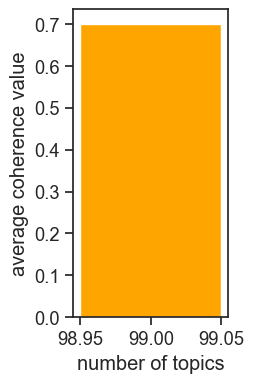

In [4]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
def to_plot_avcohval(number_of_topics):
    # Number of topics to return
    num_topics = number_of_topics
    # Numer of topic words to print out
    num_topic_words = 20
    # Initialize the model
    model = tp.LDAModel(k=num_topics)
    # Add each document to the model, after splitting it up into words
    for text in training_data:
        model.add_doc(text.strip().split())
    # Iterate over the data 10 times
    iterations = 10
    for i in range(0, 100, iterations):
        model.train(iterations)
    coh = tp.coherence.Coherence(model, coherence='c_v')
    average_coherence = coh.get_score()
    plt.figure(figsize=(2, 4))
    plt.bar(num_topics, average_coherence, width=0.1, bottom=None, align='center', color='orange', data=None)
    plt.xlabel('number of topics')
    plt.ylabel('average coherence value')
    return plt.show()
    

# To test the function, I set the number of topics to 99,
# and it returned an average coherence value of a slightly lower than 0.7.
# This is in line with the previous findings of a model with 100 topics.
to_plot_avcohval(99)

In the next part, I would like to work with a model with 15 topics, as 15 topics are more managable in a heatmap than 50 topics. Therefore, I am going to retrain the model.

In [22]:
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 20
# Initialize the model
model = tp.LDAModel(k=num_topics)
# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    
print("\nTopic Model Results:\n\n")
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

president trump schiff call new impeachment said democrats never book ukraine nothing whistleblower like read times york adam story even

✨Topic 1✨

great thank total state endorsement job military maga strong complete america vote amendment vets big people second make congratulations new

✨Topic 2✨

change climate drug energy must prices industry fossil world planet companies americans price fuel people prescription stand need trump american

✨Topic 3✨

tax workers jobs billion pay economy year million dollars working class money taxes corporations wealth america cuts billionaires trump americans

✨Topic 4✨

news fake media people joe biden would even like never bad much good great cnn foxnews many get big far

✨Topic 5✨

law police today people thank federal women order god nation enforcement day america national president court great men lives american

✨Topic 6✨

border democrats wall country want must people security get immigration illegal stop 

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [23]:
# Q7a (code)
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [24]:
get_top_docs(titles, topic_distributions, topic_index=1, n=5)

### ✨Topic 1✨

great thank total state endorsement job military maga strong complete america vote amendment vets big people second make congratulations new



---


✨  
**Topic Probability**: 0.9415318965911865  
**Document**: @realDonaldTrump_1234304669368844289



✨  
**Topic Probability**: 0.9371684789657593  
**Document**: @realDonaldTrump_1237388340778782725



✨  
**Topic Probability**: 0.9371684789657593  
**Document**: @realDonaldTrump_1236634209516752896



✨  
**Topic Probability**: 0.9371684789657593  
**Document**: @realDonaldTrump_1234456341948903425



✨  
**Topic Probability**: 0.9371684789657593  
**Document**: @realDonaldTrump_1222672488934584324



In [27]:
get_top_docs(titles, topic_distributions, topic_index=4, n=5)

### ✨Topic 4✨

news fake media people joe biden would even like never bad much good great cnn foxnews many get big far



---


✨  
**Topic Probability**: 0.942571222782135  
**Document**: @realDonaldTrump_1272010315031601153



✨  
**Topic Probability**: 0.9299769401550293  
**Document**: @realDonaldTrump_1243761045925179393



✨  
**Topic Probability**: 0.9299769401550293  
**Document**: @realDonaldTrump_1243759793103306754



✨  
**Topic Probability**: 0.9267647862434387  
**Document**: @realDonaldTrump_1204840644461703170



✨  
**Topic Probability**: 0.9267647862434387  
**Document**: @realDonaldTrump_1117095396692635650



In [28]:
get_top_docs(titles, topic_distributions, topic_index=6, n=5)

### ✨Topic 6✨

border democrats wall country want must people security get immigration illegal stop crime southern time congress work done open dems



---


✨  
**Topic Probability**: 0.9390614032745361  
**Document**: @realDonaldTrump_1079727034673311746



✨  
**Topic Probability**: 0.9288194179534912  
**Document**: @realDonaldTrump_1009844059211366401



✨  
**Topic Probability**: 0.925697386264801  
**Document**: @realDonaldTrump_1289734498561617920



✨  
**Topic Probability**: 0.925697386264801  
**Document**: @realDonaldTrump_1288564064583589889



✨  
**Topic Probability**: 0.9222888946533203  
**Document**: @realDonaldTrump_1155210027025797121



In [29]:
get_top_docs(titles, topic_distributions, topic_index=2, n=5)

### ✨Topic 2✨

change climate drug energy must prices industry fossil world planet companies americans price fuel people prescription stand need trump american



---


✨  
**Topic Probability**: 0.9440087676048279  
**Document**: SenSanders_1298364158128328704



✨  
**Topic Probability**: 0.912901759147644  
**Document**: SenSanders_1070802438838501376



✨  
**Topic Probability**: 0.8983376026153564  
**Document**: SenSanders_1022933658309718016



✨  
**Topic Probability**: 0.890850841999054  
**Document**: SenSanders_873210145945288704



✨  
**Topic Probability**: 0.890850841999054  
**Document**: SenSanders_848239037517242368



In [30]:
get_top_docs(titles, topic_distributions, topic_index=12, n=5)

### ✨Topic 12✨

health care people right must country americans every make need million wage america millions public insurance free medicare american time



---


✨  
**Topic Probability**: 0.9371171593666077  
**Document**: SenSanders_1256700862962917376



✨  
**Topic Probability**: 0.9346798062324524  
**Document**: SenSanders_1234967321313206272



✨  
**Topic Probability**: 0.9320458769798279  
**Document**: SenSanders_941717207620489216



✨  
**Topic Probability**: 0.9320458769798279  
**Document**: SenSanders_1220732734240362496



✨  
**Topic Probability**: 0.9291906356811523  
**Document**: SenSanders_1088533144821686272



In [38]:
get_top_docs(titles, topic_distributions, topic_index=3, n=5)

### ✨Topic 3✨

tax workers jobs billion pay economy year million dollars working class money taxes corporations wealth america cuts billionaires trump americans



---


✨  
**Topic Probability**: 0.9504639506340027  
**Document**: SenSanders_1338869753360707584



✨  
**Topic Probability**: 0.9473485350608826  
**Document**: @realDonaldTrump_1346686979325521921



✨  
**Topic Probability**: 0.9456390738487244  
**Document**: SenSanders_1099380342018912256



✨  
**Topic Probability**: 0.9375253319740295  
**Document**: SenSanders_1087828557794082816



✨  
**Topic Probability**: 0.9351038336753845  
**Document**: SenSanders_1083390666443505664



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

**Q7b** (words)<br>

As proposed by Macaulay (2019), based on an analysis of one of Trump's and two of Sanders' speeches, while Trump tends to focus on the topics of China, Japan, economic war, trade war, trade deals, Mexico, the border, the wall, illegal immigration, invasion, Iraq, Obamacare ('the big lie', 'have nothing', 'have no plan'), Ford, the American economy, him being the best 'jobs president', Sanders seems to be engaged with issues of healthcare, childcare, retirement savings, the elderly, poverty, free university education, massive wealth and income inequality, and renewable energy, among others. "Both Trump and Sanders promote
the value of the American 'producer' class, Trump focussing on the need for jobs, and Sanders focussing on the need for a higher minimum wage, paid university education and universal health care (Macaulay 2019:171)." <br>

After having retrained the model with 15 as the number of topics, I was interested to see the top documents of Topic 1, 4, 6, 2, 12, and 3, in light of the above discussion.<br>

Topic 1:<br>The words *job*, *military*, *maga*, *vets* appear among the keywords, suggesting that the top documents are most probably associated with Trump. In his announcement speech he said: "We need a leader that can bring back our jobs, can bring back our manufacturing, our military, can take care of our vets." (Macaulay 2019:177), highlighting the lack of and the need for jobs and America's need for a 'jobs President'. The word MAGA refers to Make America Great Again, which was Trump's political slogan during his 2016 presidential campaign.<br>
Based on these ideas, I would expect the top 5 documents being from Trump, and as we can see, this is indeed the case with a 0.93-0.94 topic probability. <br>

Topic 4:<br> The words *fake*, *news*, *media*, *foxnews* and *cnn* appear among the keywords suggesting a relation to one of Trump's main interests 'fake news'. Therefore, I believe that the top 5 documents would be from Trump. As the results show, this is the case with a 0.93-0.94 topic probability.<br>

Topic 6:<br> Topic 6 seems to be about the issues of illegal immigration (from Mexico to the US), the border, and the wall, which are characteristic topics of Trump's (Macaulay 2019). Hence, I would expect the top 5 documents to come from Trump's tweets. As the results illustrate, they are indeed from Trump with a 0.92-0.94 topic probability. <br>

Topic 2:<br> Topic 2 is associated with the topics of climate change, fossil fuels, energy, and the planet, which are more of Sanders' concern (Macaulay 2019). Accordingly, we can see that the top 5 documents are from Sanders with a 0.89-0.94 topic probability.<br>

Topic 12:<br>The keywords *health*, *care*, *medicare*, *free*, *wage*, and *insurance* suggest topics that are mainly emphasized by Sanders, i.e. healthcare, health insurance, minimum wage, etc. (Macaulay 2019). Thus, I would expect that the top 5 documents are from Sanders. According to the results, this is the case, they are from Sanders with a 0.93 topic probability. <br>

Topic 3:<br>As for Topic 3, it is related to taxes, the workers, the economy, wealth, and the corporations. These are key issues for both Trump and Sanders, however, they approach them from different perspectives (Macaulay 2019). Consequently, I assume that  the top 5 documents would include documents from both politicans. According to the results, 4 tweets are from Sanders and 1 is from Trump with a 0.94-0.95 topic probability.<br>

To summarize, as the top 5 documents for some of the topics demonstrate, whereas Topic 1, 4 and 6 (jobs, military, Make America Great Again, fake news, illegal immigration, Mexico) are more characteristic of Trump, Topic 2 and 12 (climate change, renewable energy, fossil fuels, healthcare, health insurance, social security, minimum wage) are more typical of Sanders. This can be due to their overarching populist narratives (Macaulay 2019). Topic 3 (the workers, the working class, the economy, wealth, corporations) is of both politicians' concern. While Sanders emphasized the massive wealth inequality present in the US, Trump pointed out the problem that American corporations are outsourcing their jobs.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [49]:
# Create a sample of tweets
target_labels = sample(titles,100)

In [50]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
sns.set(style='ticks', font_scale=2.4)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=2.4)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

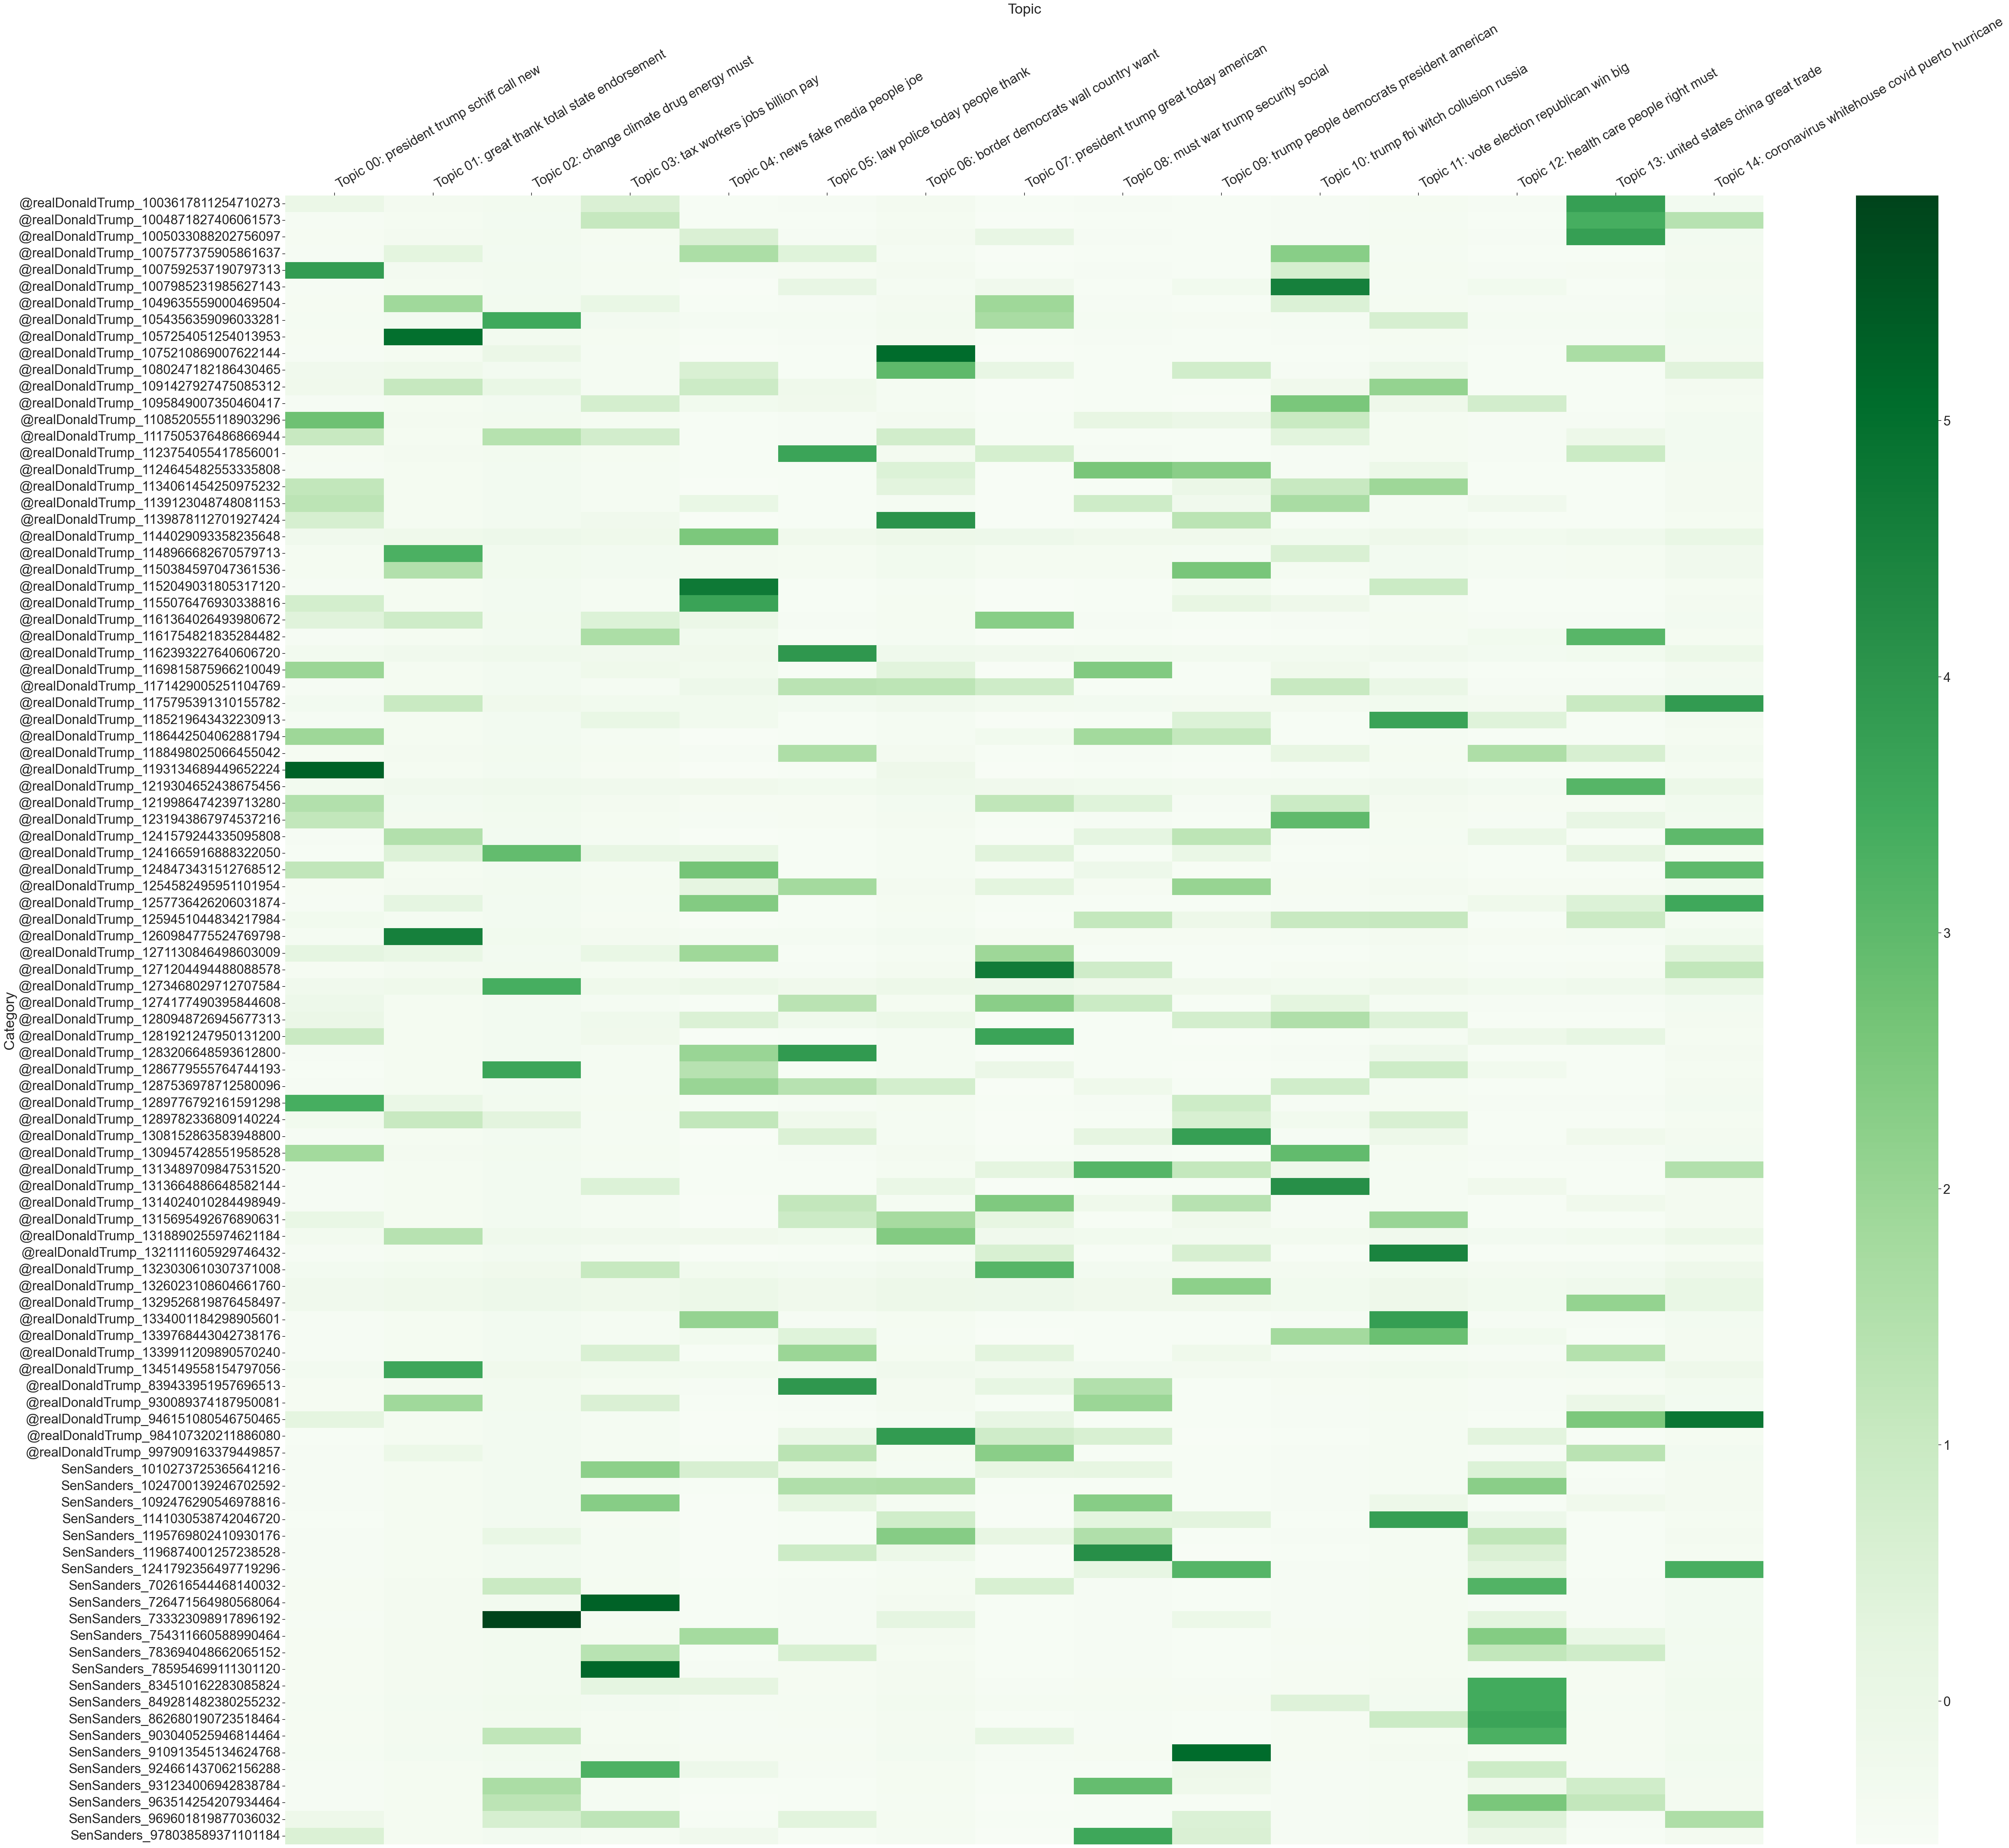

In [51]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Greens',
                                 dim=(60,52))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

**Q9** (words)<br>

In the above heatmap, the darker rectangles represent higher probabilities.<br>

According to the heatmap, Trump's posts tend to be more likely to be associated with Topic 0, 1, 4, 6, 7, 10, 14 (Trump-Ukraine scandal, MAGA, fake news, Mexico - illegal immigration, Russian interference in the 2016 US elections, coronavirus) and Sanders' tweets seem to be more related to Topic 2, 3, 8, 9, 12 (climate change, workers - wealth inequality, social security, US politics, healthcare).<br>

Topic 3 and 12 (workers - wealth inequality, healthcare) seem to be almost completely absent from Trump's tweets. As for Sanders, his posts seem to be the least connected to Topic 0, 1 and 10 (Trump-Ukraine scandal, MAGA, Russian interference in the 2016 US elections).<br>

These insights point into the direction of a somewhat complementary distribution of the topics that these politicians talk about, and reflect what topics they focus on the most.<br>
The finding about Topic 3 is also interesting, as in the previous task we have seen that the second topmost document for this topic is from Trump. <br>
However, we should bear in mind that the above heatmap (based on a sample of tweets) contains a larger number of tweets from Trump than from Sanders. Hence, more research needs to be conducted on a more balanced sample.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [53]:
# X2 (code)
sanderstitles = []
for title in titles:
    if 'Sanders' in title:
        sanderstitles.append(title)
        
trumptitles = []
for title in titles:
    if 'Trump' in title:
        trumptitles.append(title)

sample_sanders = sample(sanderstitles, 50)
sample_trump = sample(trumptitles, 50)
target_labels = sample_sanders + sample_trump

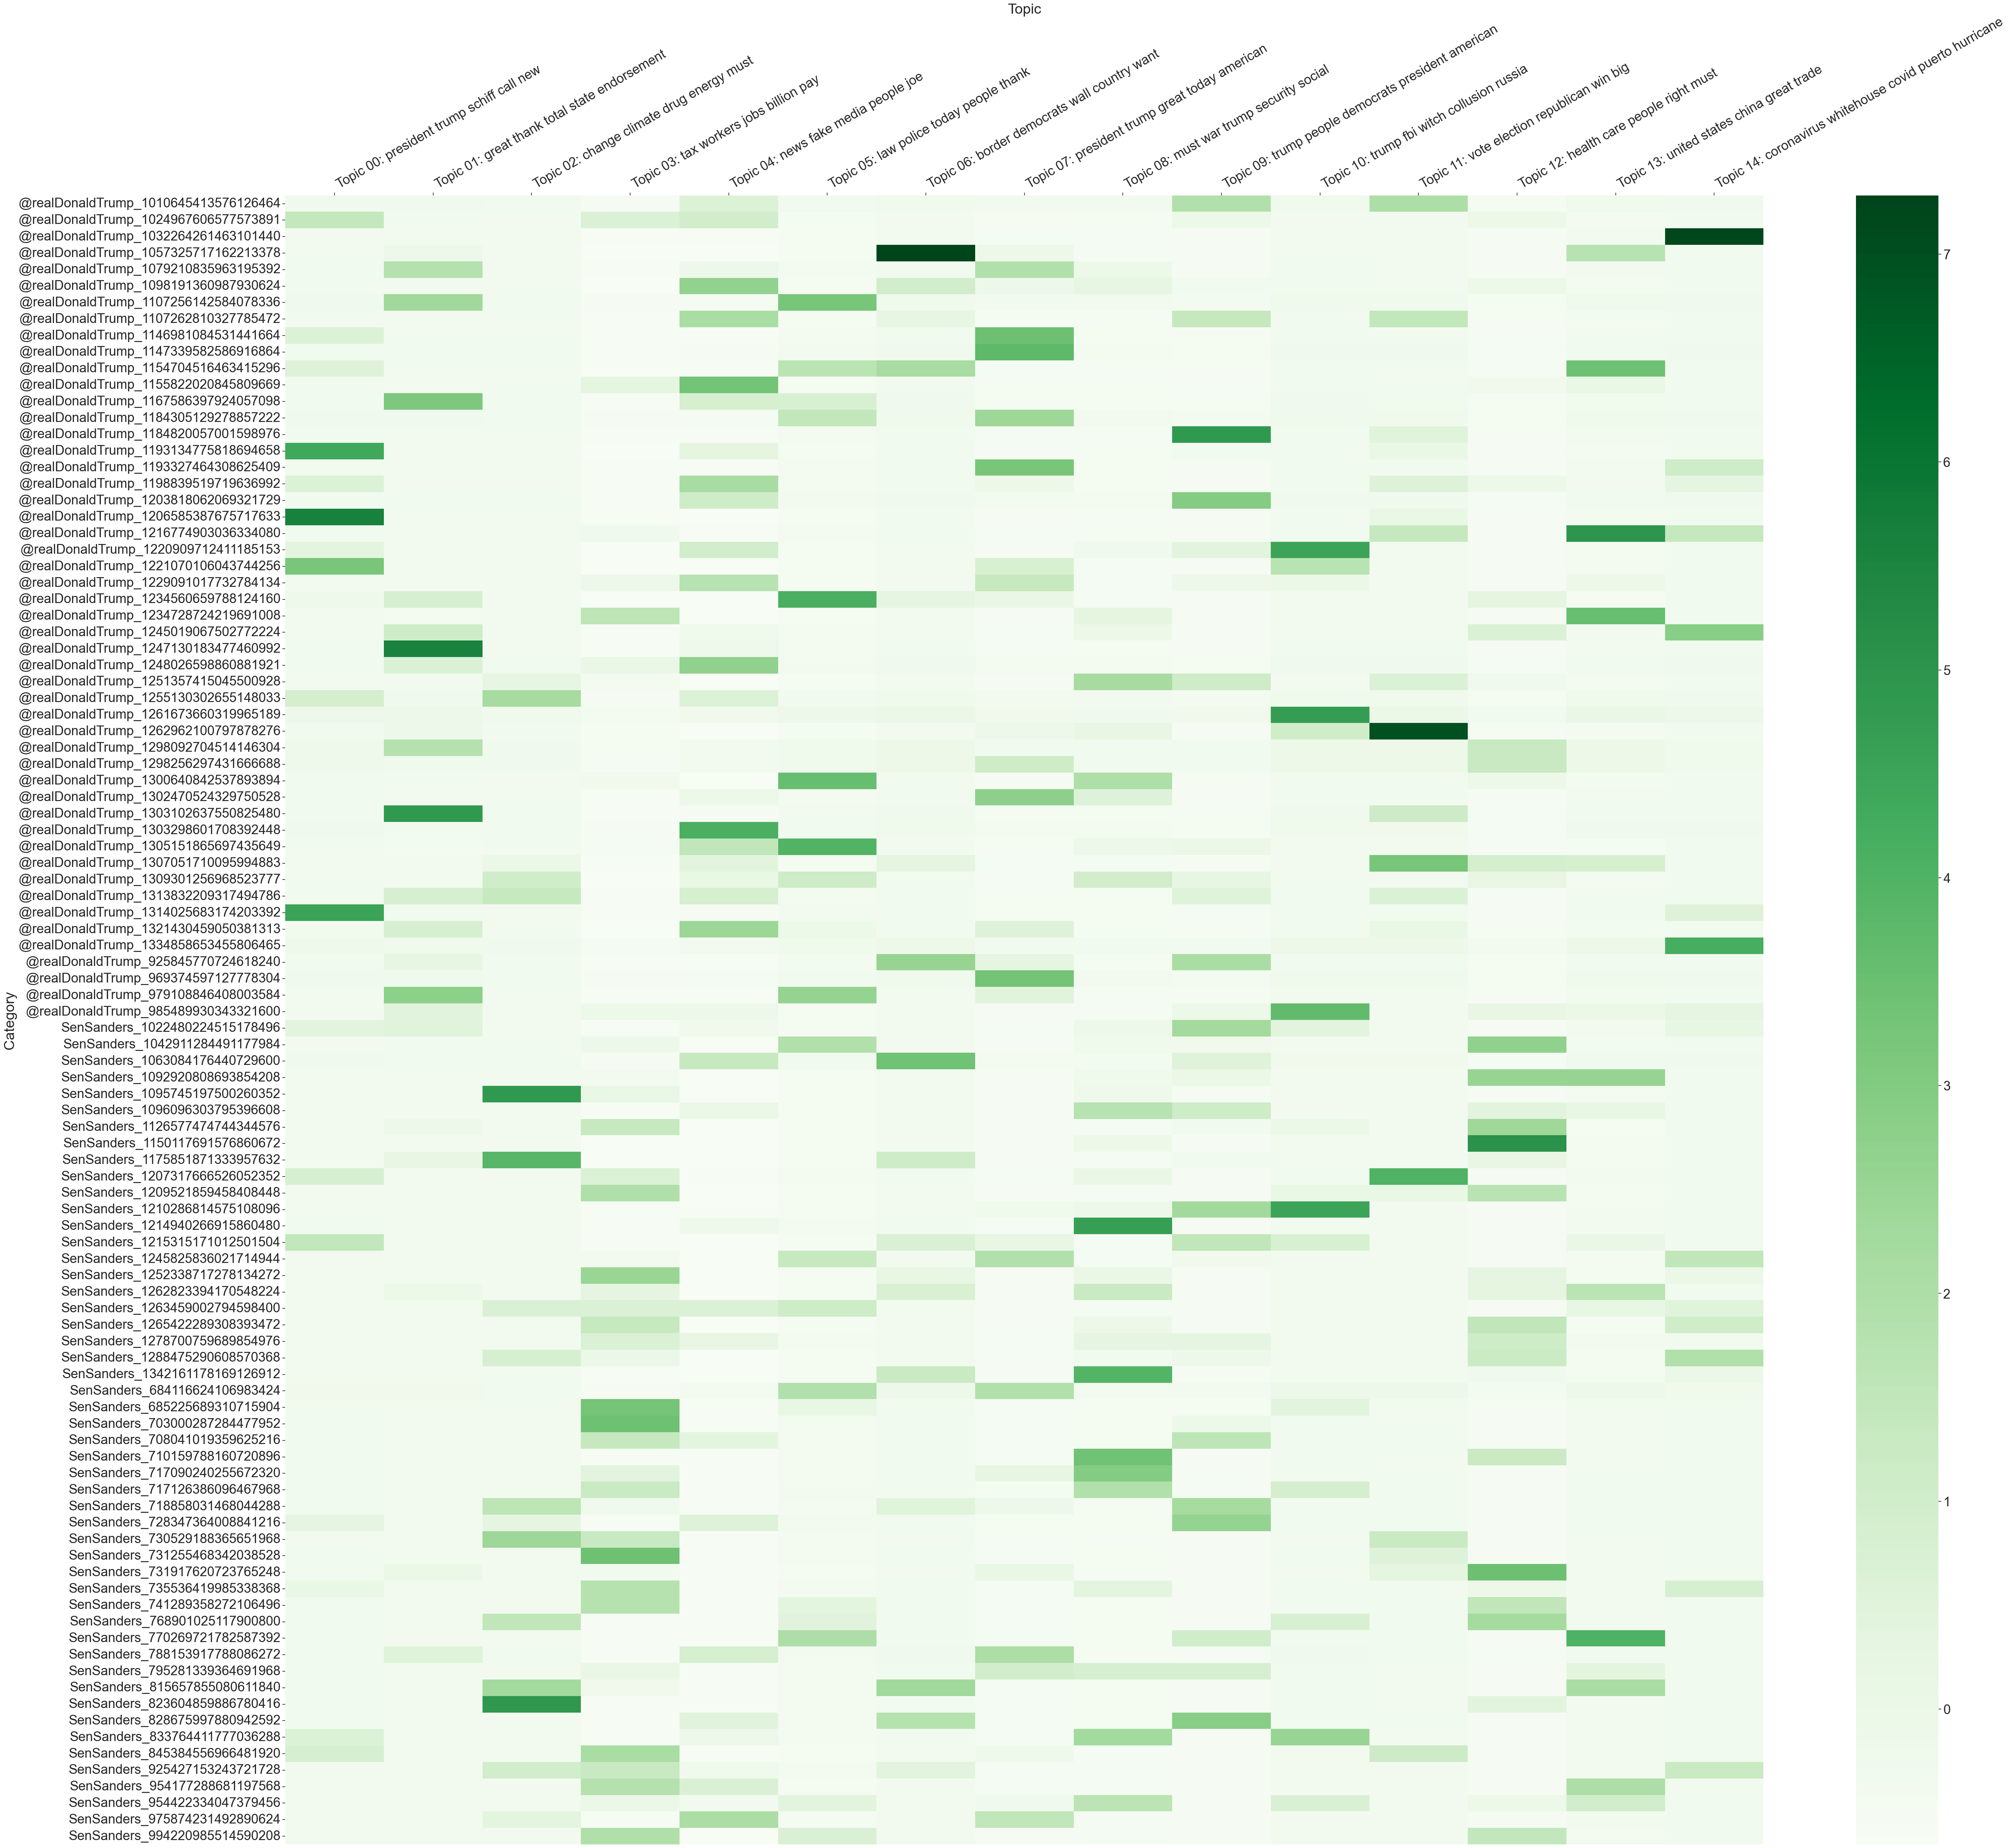

In [54]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Greens',
                                 dim=(60,52))

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)